# Problem Session 11
## MNIST of Fashion I

In this notebook you will work on problems that relate to our neural network content. In particular, this material will touch on the following lecture notebooks:
- `Lectures/Neural Networks/1. Perceptrons`,
- `Lectures/Neural Networks/2. The MNIST Data Set`,
- `Lectures/Neural Networks/3. Multilayer Neural Networks` and
- `Lectures/Neural Networks/4. keras`.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import set_style

##### 1. Load the data

In this notebook you will work to build neural networks to classify images of common fashion items. First run the code below in order to load the data set. Then we will discuss the data set more.

In [2]:
## docs: https://keras.io/api/datasets/fashion_mnist/
from keras.datasets import fashion_mnist

In [3]:
## This can take a little bit to run,
## especially if it is your first time running this code
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

label_dict = {0:"T-shirt/top",
                 1:"Trouser",
                 2:"Pullover",
                 3:"Dress",
                 4:"Coat",
                 5:"Sandal",
                 6:"Shirt",
                 7:"Sneaker",
                 8:"Bag",
                 9:"Ankle boot"}

##### 2. Learn about the data set

This data set is an equivalent of the MNIST data set, but with scans of common fashion items instead of hand-drawn instances of the digits $0-9$. The ten different items featured in this data set can be seen in the code chunk above in the `label_dict` variable.

First answer these questions, then run the prewritten code to see a few example images. How many observations are in the training set? How many in the test set? What are the dimensions of the pixel grid for each image?

##### Sample Solution

In [4]:
np.shape(X_train)

(60000, 28, 28)

In [5]:
np.shape(X_test)

(10000, 28, 28)

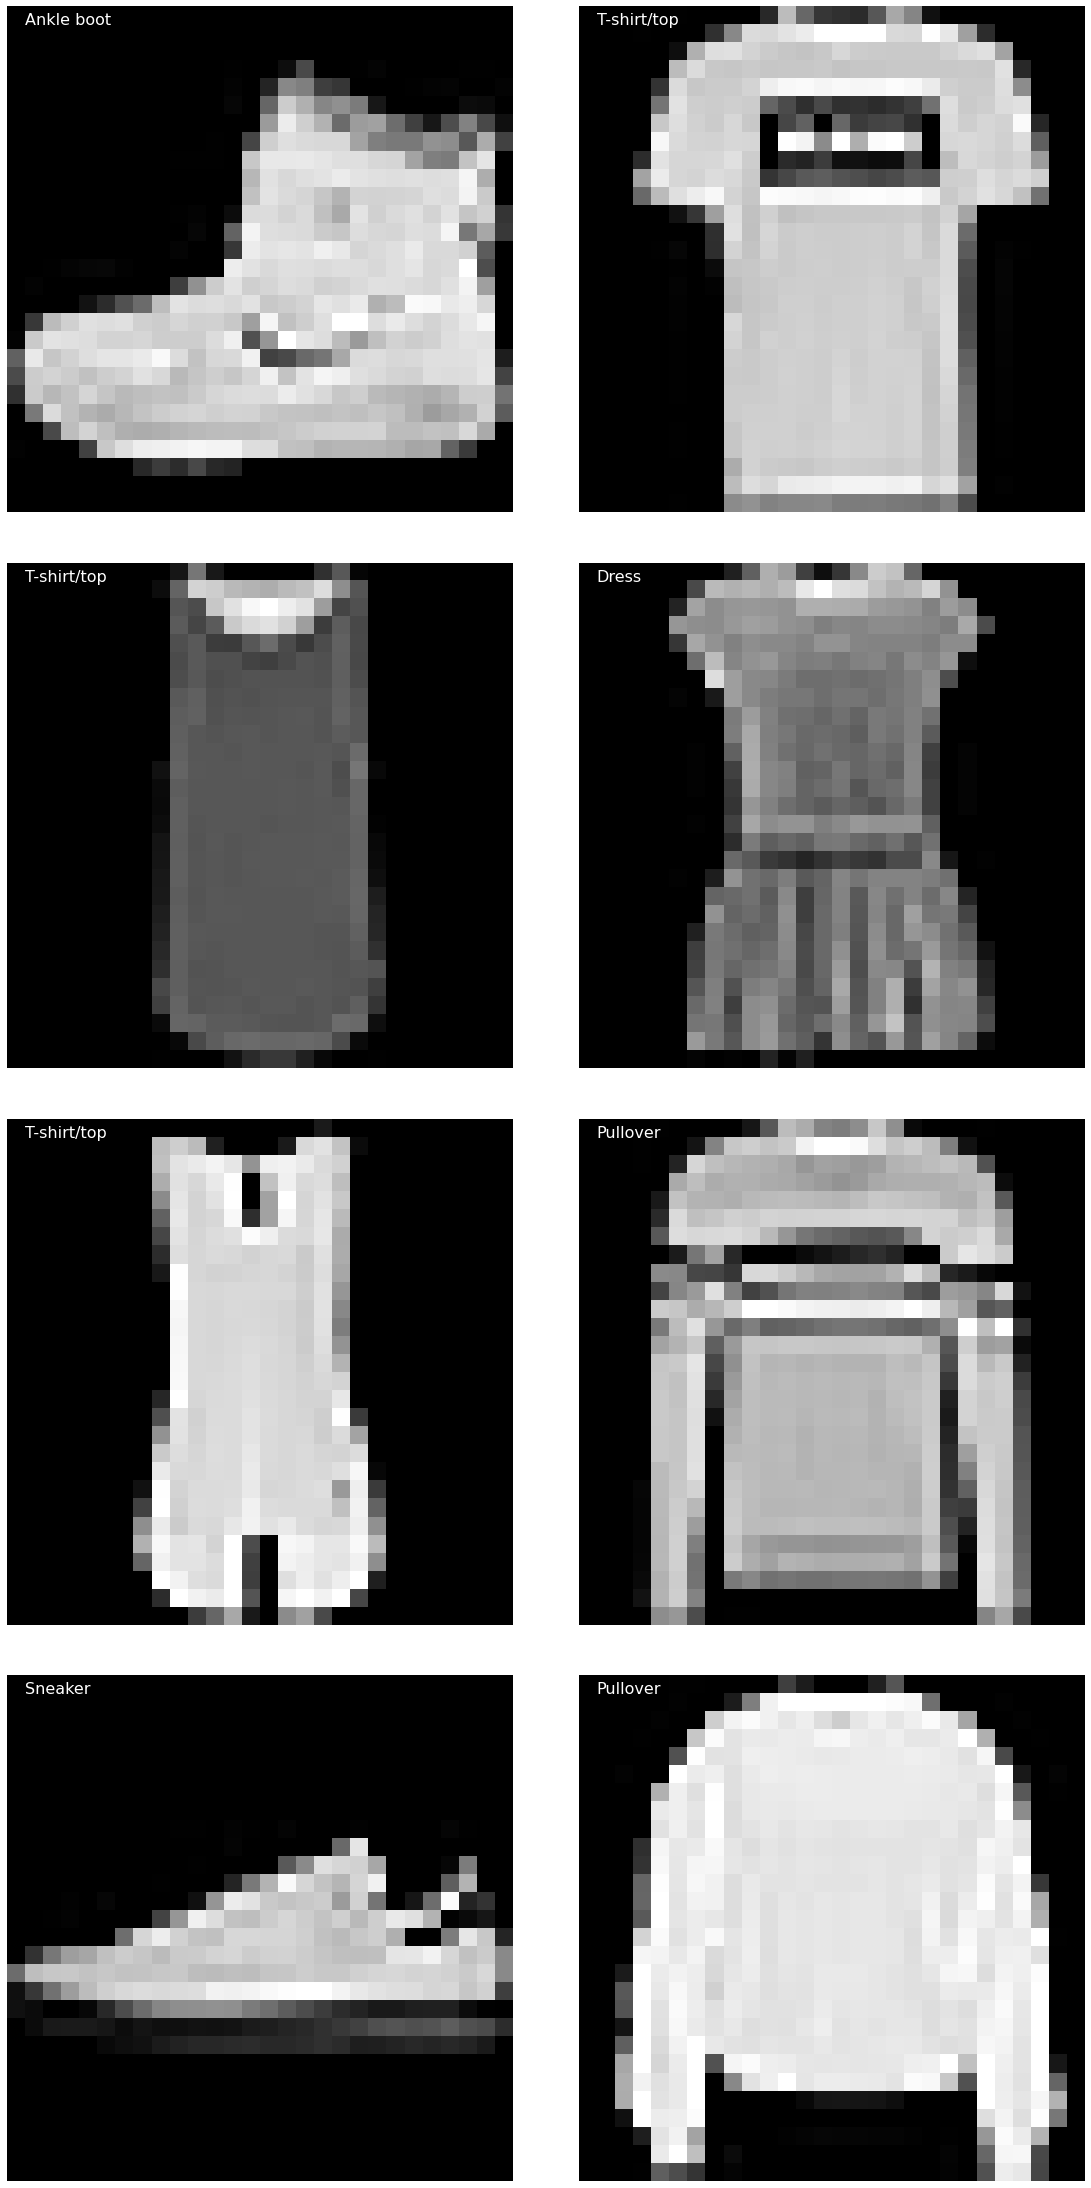

In [6]:
## This plots the first 8 training images
fig,ax = plt.subplots(4,2, figsize=(20,40))

for i in range(8):
    ax[i//2, i%2].imshow(X_train[i], cmap='gray')
    ax[i//2, i%2].text(.5,.5,label_dict[y_train[i]], c="white", fontsize=16)
    ax[i//2, i%2].axis("off")
    
plt.subplots_adjust(hspace=.1,wspace=.05)
plt.show()

##### 3. Validation set

Make a validation set from the training set. Use $20\%$ of the training set. We will use this to compare neural net performance.

##### Sample Solution

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_tt, X_val, y_tt, y_val = train_test_split(X_train, y_train,
                                               shuffle=True,
                                               random_state=213,
                                               test_size=.2)

##### 4. Prepare the data

The maximum value of any pixel in these images is `255`, the minimum value of any pixel is `0`.

Using this information scale the data so that the maximum value goes to `1` and the minimum value goes to `0`.

Then reshape the array so that it is a two dimensional array, i.e. each column represents a single pixel while each row represents a single image.

##### Sample Solution

In [9]:
X_tt = X_tt/255
X_val = X_val/255

X_tt = X_tt.reshape(-1, 28*28)
X_val = X_val.reshape(-1, 28*28)

##### 5. Your first neural network

We will start by building a feed forward network with a single hidden layer using `keras`. 

Fill in the missing code below to build and fit this network.

In [10]:
## Import the following
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical


### If you have an earlier version of keras ###
# from keras.utils import to_categorical

In [11]:
## make an empty model here with models.Sequential
## only run this once
model1 =  models.Sequential()

In [12]:
### ONLY Run this once, when your code is entered ###
## Add the first Dense layer, 
## give it 100 nodes
## the 'relu' acitavtion function and
## don't forget to set the input_shape
model1.add(layers.Dense(100, activation='relu', input_shape=(28*28,)))


## Add the output layer
## This is a Dense layer
## it should have 10 nodes, because our data has 10 classes
## and its activation function should be the 'softmax'
model1.add(layers.Dense(10, activation='softmax'))

In [13]:
## use model.summary to look at the architecture of your model
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [14]:
#### ONLY RUN ONCE ####
## Compile the model here
## Use the `rmsprop` optimizer,
## the 'categorical_crossentropy' loss function
## and return 'accuracy' as a metric
model1.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [15]:
## fit the model and store the history in a variable
## train for 100 epochs,
## use a batch size of 512
## remember to apply to_categorical to y
## and include the validation_data
n_epochs = 100

history1 = model1.fit(X_tt,
                       to_categorical(y_tt),
                       epochs = n_epochs,
                       batch_size = 512,
                       validation_data = (X_val, to_categorical(y_val)))

Epoch 1/100
31/94 [========>.....................] - ETA: 0s - loss: 1.1011 - accuracy: 0.6368 

2022-05-18 11:30:55.022103: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-18 11:30:55.022259: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


94/94 [==============================] - 0s 3ms/step - loss: 0.8011 - accuracy: 0.7286 - val_loss: 0.6325 - val_accuracy: 0.7768
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.8140 - val_loss: 0.4948 - val_accuracy: 0.8271
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.8343 - val_loss: 0.4466 - val_accuracy: 0.8397
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8452 - val_loss: 0.4776 - val_accuracy: 0.8319
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8535 - val_loss: 0.4114 - val_accuracy: 0.8504
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8615 - val_loss: 0.4082 - val_accuracy: 0.8490
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8656 - val_loss: 0.4116 - val_accuracy: 0.8492
Epoch 8/100
94/94 [======

Epoch 59/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1617 - accuracy: 0.9410 - val_loss: 0.3521 - val_accuracy: 0.8821
Epoch 60/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.9410 - val_loss: 0.3248 - val_accuracy: 0.8876
Epoch 61/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.9424 - val_loss: 0.3231 - val_accuracy: 0.8918
Epoch 62/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9425 - val_loss: 0.3430 - val_accuracy: 0.8854
Epoch 63/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.9433 - val_loss: 0.3588 - val_accuracy: 0.8842
Epoch 64/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9450 - val_loss: 0.3209 - val_accuracy: 0.8929
Epoch 65/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1514 - accuracy: 0.9457 - val_loss: 0.3473 - val_accuracy: 0.8848
Epoch 

##### 6. Examine the accuracy

Plot the accuracy of the model on both the validation and training sets. Does it look like we chose enough epochs, or should we have used more than $100$? Does it look the model has started to overfit on the training data?

In [16]:
## store the history dictionary in history_dict1
history_dict1 = history1.history

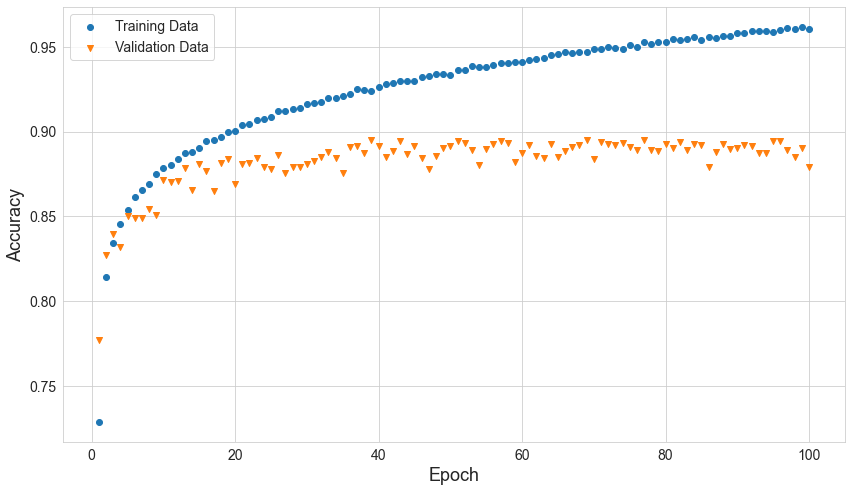

In [17]:
set_style("whitegrid")

plt.figure(figsize=(14,8))

plt.scatter(range(1,n_epochs+1), 
            history_dict1['accuracy'], 
            label="Training Data")
plt.scatter(range(1,n_epochs+1), 
            history_dict1['val_accuracy'], 
            marker='v',
            label="Validation Data")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)


plt.show()

##### 7. A network with two layers

Now make a network with two hidden layers for this problem. You choose the architecture (the size of each of the two hidden layers). Compare the accuracies on the validation set for the first model and this model. Which one seems to perform better? Choose one of these two models.

In [18]:
## make a sequential model
model2 =  models.Sequential()


## Add the layers

## layer 1
model2.add( layers.Dense(100, activation='relu', input_shape=(28*28,)) )

## layer 2
model2.add( layers.Dense(100, activation='relu'))

## out layer
model2.add( layers.Dense(10, activation='softmax'))


## compile the network
model2.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])


## fit the network
history2 = model2.fit(X_tt,
                       to_categorical(y_tt),
                       epochs = n_epochs,
                       batch_size = 512,
                       validation_data = (X_val, to_categorical(y_val)))

history_dict2 = history2.history

Epoch 1/100
94/94 [==============================] - 0s 3ms/step - loss: 0.8117 - accuracy: 0.7191 - val_loss: 0.5600 - val_accuracy: 0.8044
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.8114 - val_loss: 0.4610 - val_accuracy: 0.8385
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.8348 - val_loss: 0.4640 - val_accuracy: 0.8332
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8476 - val_loss: 0.4649 - val_accuracy: 0.8366
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8581 - val_loss: 0.3982 - val_accuracy: 0.8562
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8654 - val_loss: 0.3637 - val_accuracy: 0.8658
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8716 - val_loss: 0.3750 - val_accuracy: 0.8608
Epoch 8/100
9

Epoch 59/100
94/94 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.9545 - val_loss: 0.4197 - val_accuracy: 0.8800
Epoch 60/100
94/94 [==============================] - 0s 3ms/step - loss: 0.1159 - accuracy: 0.9562 - val_loss: 0.3978 - val_accuracy: 0.8867
Epoch 61/100
94/94 [==============================] - 0s 3ms/step - loss: 0.1169 - accuracy: 0.9559 - val_loss: 0.4043 - val_accuracy: 0.8909
Epoch 62/100
94/94 [==============================] - 0s 3ms/step - loss: 0.1144 - accuracy: 0.9570 - val_loss: 0.4267 - val_accuracy: 0.8813
Epoch 63/100
94/94 [==============================] - 0s 3ms/step - loss: 0.1134 - accuracy: 0.9586 - val_loss: 0.4532 - val_accuracy: 0.8823
Epoch 64/100
94/94 [==============================] - 0s 3ms/step - loss: 0.1118 - accuracy: 0.9583 - val_loss: 0.4080 - val_accuracy: 0.8911
Epoch 65/100
94/94 [==============================] - 0s 3ms/step - loss: 0.1089 - accuracy: 0.9595 - val_loss: 0.4024 - val_accuracy: 0.8914
Epoch 

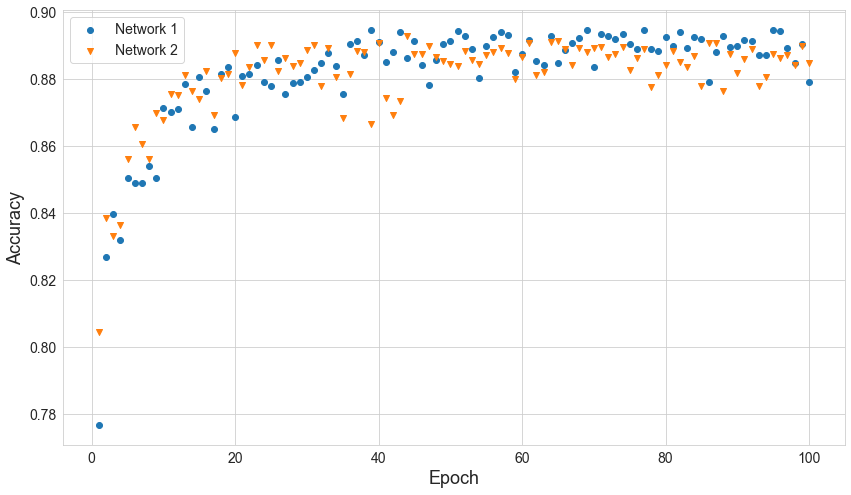

In [19]:
plt.figure(figsize=(14,8))

plt.scatter(range(1,n_epochs+1), 
            history_dict1['val_accuracy'], 
            label="Network 1")
plt.scatter(range(1,n_epochs+1), 
            history_dict2['val_accuracy'], 
            marker='v', 
            label="Network 2")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)

plt.show()

The two networks I considered had similar performance. In that case it is preferable to go with the simpler network.

##### 8. PCA preprocessing

It is possible that preprocessing the data by running it through PCA first could help.

Try a neural network fit to PCA transformed data. Note that because we scaled the pixels earlier, we do not need to run the data through `StandardScaler` prior to PCA. Make sure you remember to transform the validation set as well.

In [20]:
from sklearn.decomposition import PCA

In [21]:
## make a pca object with n_componenets = .99
pca = PCA(.99)

## fit the pca on X_tt
pca.fit(X_tt)

## transform X_tt
X_tt_pca = pca.transform(X_tt)

## transform X_val
X_val_pca = pca.transform(X_val)

In [22]:
## Build the network on the pca data here
## make a sequential model
model3 =  models.Sequential()


## Add the layers

## layer 1
model3.add( layers.Dense(100, activation='relu', input_shape=(X_tt_pca.shape[1],)) )

## out layer
model3.add( layers.Dense(10, activation='softmax'))


## compile the network
model3.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])


## fit the network
history3 = model3.fit(X_tt_pca,
                       to_categorical(y_tt),
                       epochs = n_epochs,
                       batch_size = 512,
                       validation_data = (X_val_pca, to_categorical(y_val)))

history_dict3 = history3.history

Epoch 1/100
94/94 [==============================] - 0s 2ms/step - loss: 0.9938 - accuracy: 0.7400 - val_loss: 0.5376 - val_accuracy: 0.8271
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8516 - val_loss: 0.4182 - val_accuracy: 0.8562
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.8696 - val_loss: 0.3861 - val_accuracy: 0.8614
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8793 - val_loss: 0.3691 - val_accuracy: 0.8691
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8871 - val_loss: 0.3566 - val_accuracy: 0.8724
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8932 - val_loss: 0.3483 - val_accuracy: 0.8756
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.8989 - val_loss: 0.3407 - val_accuracy: 0.8778
Epoch 8/100
9

Epoch 59/100
94/94 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.9981 - val_loss: 0.4948 - val_accuracy: 0.8840
Epoch 60/100
94/94 [==============================] - 0s 1ms/step - loss: 0.0205 - accuracy: 0.9983 - val_loss: 0.5025 - val_accuracy: 0.8842
Epoch 61/100
94/94 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9986 - val_loss: 0.5107 - val_accuracy: 0.8840
Epoch 62/100
94/94 [==============================] - 0s 1ms/step - loss: 0.0181 - accuracy: 0.9986 - val_loss: 0.5217 - val_accuracy: 0.8817
Epoch 63/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9987 - val_loss: 0.5264 - val_accuracy: 0.8832
Epoch 64/100
94/94 [==============================] - 0s 1ms/step - loss: 0.0157 - accuracy: 0.9991 - val_loss: 0.5336 - val_accuracy: 0.8832
Epoch 65/100
94/94 [==============================] - 0s 1ms/step - loss: 0.0148 - accuracy: 0.9990 - val_loss: 0.5416 - val_accuracy: 0.8825
Epoch 

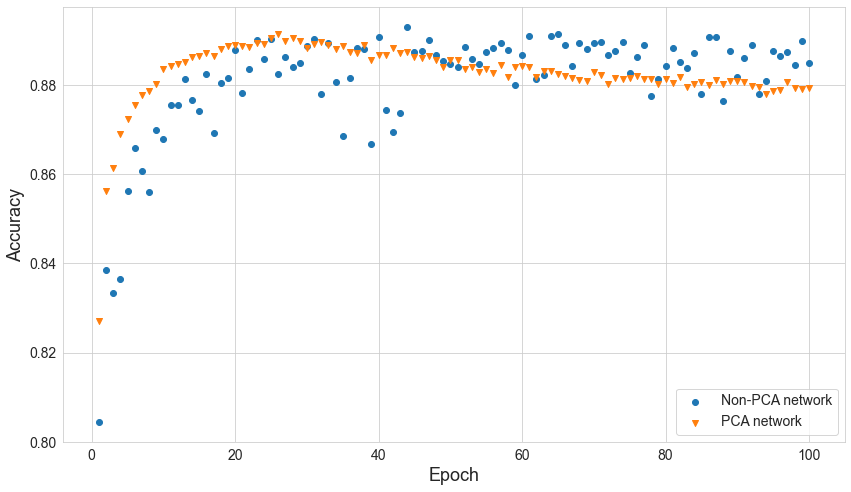

In [23]:
## Compare the accuracy on the pca and non-pca networks
plt.figure(figsize=(14,8))

plt.scatter(range(1,n_epochs+1), 
            history_dict2['val_accuracy'], 
            label="Non-PCA network")
plt.scatter(range(1,n_epochs+1), 
            history_dict3['val_accuracy'], 
            marker='v', 
            label="PCA network")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)


plt.show()

Which would you choose?

##### Sample Solution

I would go with the PCA transformed network. It appears to train more quickly and also seems to be less sporadic than the non-PCA network.

##### 9. Play around

Feel free to play around and build more networks here. Can you build a network that improves upon the best one you have built so far?

##### 10. Saving a trained model.

When you have a model that you are happy with, make a fresh version of the model and train it using the optimal number of epochs. Then run the code below to save the trained model on your computer. We will see how to load this model in a later lecture notebook.

In [24]:
## Create and train your final model here
final_model =  models.Sequential()


## layer 1
final_model.add( layers.Dense(100, activation='relu', input_shape=(X_tt_pca.shape[1],)) )

## out layer
final_model.add( layers.Dense(10, activation='softmax'))


## compile the network
final_model.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])


## fit the network
final_history = final_model.fit(X_tt_pca,
                                   to_categorical(y_tt),
                                   epochs = 20,
                                   batch_size = 512,
                                   validation_data = (X_val_pca, to_categorical(y_val)))

Epoch 1/20
94/94 [==============================] - 0s 2ms/step - loss: 1.0153 - accuracy: 0.7336 - val_loss: 0.5378 - val_accuracy: 0.8297
Epoch 2/20
94/94 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.8501 - val_loss: 0.4198 - val_accuracy: 0.8520
Epoch 3/20
94/94 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8685 - val_loss: 0.3881 - val_accuracy: 0.8610
Epoch 4/20
94/94 [==============================] - 0s 1ms/step - loss: 0.3431 - accuracy: 0.8795 - val_loss: 0.3707 - val_accuracy: 0.8665
Epoch 5/20
94/94 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8874 - val_loss: 0.3588 - val_accuracy: 0.8702
Epoch 6/20
94/94 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.8933 - val_loss: 0.3497 - val_accuracy: 0.8737
Epoch 7/20
94/94 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.9002 - val_loss: 0.3417 - val_accuracy: 0.8777
Epoch 8/20
94/94 [==

In [25]:
## This code will save the final model
final_model.save("nb11_matts_final_model")

INFO:tensorflow:Assets written to: nb11_matts_final_model/assets


2022-05-18 11:31:59.351308: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)